# 4.5.3 Ejemplo: regularización L2

**Datos:** $\quad\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\},\quad p(y_n\mid\boldsymbol{x}_n,\boldsymbol{\theta})=\mathcal{N}(y_n\mid\boldsymbol{w}^t\boldsymbol{x}_n, \sigma^2),\;\sigma^2\,$ fija

**Ejemplo:** $\;$ modelos de regresión polinómica simple de grado $\,2\,$ (modelo real) y grado $\,G=14\,$ (modelo postulado) 
$$\begin{align*}
p(y\mid x)&=\mathcal{N}(y\mid \mu, \sigma^2)%
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4\\%
p(y\mid x,\boldsymbol{w})&=\mathcal{N}(y\mid \mu, \sigma^2)%
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x;\boldsymbol{w})=\sum_{g=0}^G w_gx^g=\boldsymbol{w}^t[1,x,x^2,\dotsc,x^G]\quad\text{y}\quad\sigma^2=4
\end{align*}$$

**Regularización L2 o penalización de pesos (weight decay):** $\;$ con notación matricial, $\,\mathbf{X}=[\boldsymbol{x}_1^t;\ldots;\boldsymbol{x}_N^t]\;$ y $\;\boldsymbol{y}=(y_1,\dotsc,y_N)^t$ 
$$\hat{\boldsymbol{w}}_{\text{map}}=\operatorname*{argmin}_{\boldsymbol{w}}\;%
(\boldsymbol{y}-\mathbf{X}\boldsymbol{w})^t(\boldsymbol{y}-\mathbf{X}\boldsymbol{w})+\lambda\lVert\boldsymbol{w}\rVert_2^2
\quad\to\quad(\mathbf{X}^t\mathbf{X}+\lambda\mathbf{I})\hat{\boldsymbol{w}}=\mathbf{X}^t\boldsymbol{y}$$

**Ejemplo (cont.):** $\;$ ajuste del modelo postulado con diferentes valores de $\lambda$

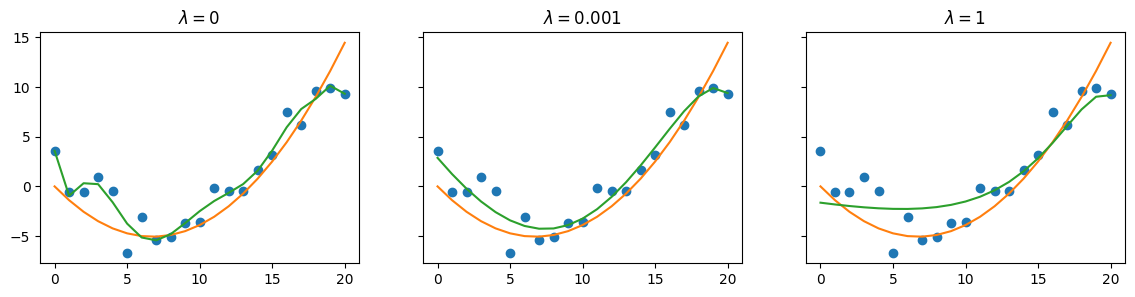

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.preprocessing import MinMaxScaler
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2; X = np.linspace(0.0, 20, N)
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X)); y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]; G = 14
for g in np.arange(2, G+1):
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
scaler = MinMaxScaler(feature_range=(-1, 1)); X1 = scaler.fit_transform(X1)
lams = (0, 1e-3, 1); I = np.eye(G+1)
fig, axs = plt.subplots(1, len(lams), figsize=(14, 3), sharey=True)
for i, lam in enumerate(lams):
    ax = axs.flat[i]; ax.set_title(f'$\lambda={lam}$')
    ax.plot(X, y, 'o'); ax.plot(X, y_mean, '-')
    w = np.linalg.lstsq(X1.T @ X1 + lam * I, X1.T @ y, rcond=None)[0]
    y_pred = X1 @ w; ax.plot(X, y_pred, '-')